In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy import stats 
import statsmodels.api as sm
import random as rd
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Dataset into Pandas Dataframe

In [2]:
#Reading data into pandas df
df = pd.read_csv("https://raw.githubusercontent.com/chiraggarg95/DS-203-Assignments/Assignment_4/master.csv")

# Display part of Dataset

In [3]:
#Displaying part of dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Top 6 countries by average yearly suicides

In [4]:
df_avg_yrly_sui = df.groupby(["country", "year"]).sum().reset_index().groupby(["country"]).mean()["suicides_no"].sort_values(ascending=False)
df_avg_yrly_sui

country
Russian Federation       44805.259259
United States            33355.258065
Japan                    26029.096774
Ukraine                  11426.785714
Germany                  11202.384615
                             ...     
Grenada                      1.461538
San Marino                   1.333333
Antigua and Barbuda          0.407407
Dominica                     0.000000
Saint Kitts and Nevis        0.000000
Name: suicides_no, Length: 101, dtype: float64

In [5]:
top_avg_yrly_suic = dict(df_avg_yrly_sui[0:6])
top_avg_yrly_suic

{'France': 10970.9,
 'Germany': 11202.384615384615,
 'Japan': 26029.09677419355,
 'Russian Federation': 44805.25925925926,
 'Ukraine': 11426.785714285714,
 'United States': 33355.25806451613}

In [6]:
print("Top 6 countries by average yearly suicides are: ")
for k in top_avg_yrly_suic:
    print("Country: " + k)
    print("Average Yearly Suicides: " + str(top_avg_yrly_suic[k]))
    print()

Top 6 countries by average yearly suicides are: 
Country: Russian Federation
Average Yearly Suicides: 44805.25925925926

Country: United States
Average Yearly Suicides: 33355.25806451613

Country: Japan
Average Yearly Suicides: 26029.09677419355

Country: Ukraine
Average Yearly Suicides: 11426.785714285714

Country: Germany
Average Yearly Suicides: 11202.384615384615

Country: France
Average Yearly Suicides: 10970.9



#Displaying No. of suicides for each year for the top 6 countries by yearly average

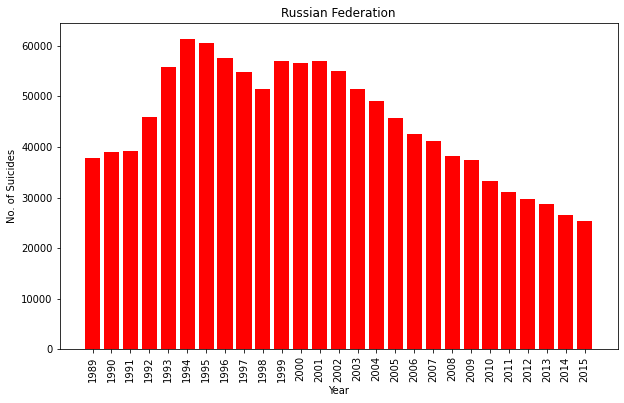

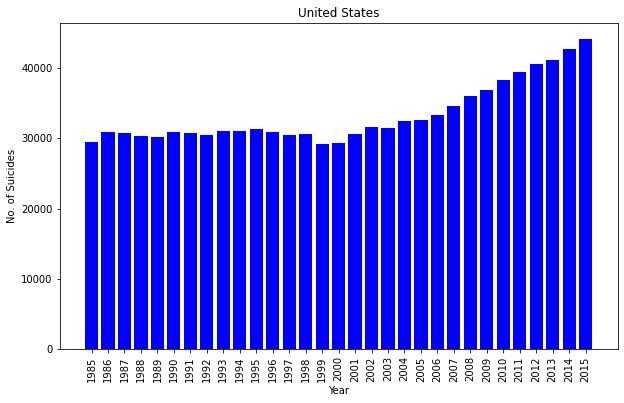

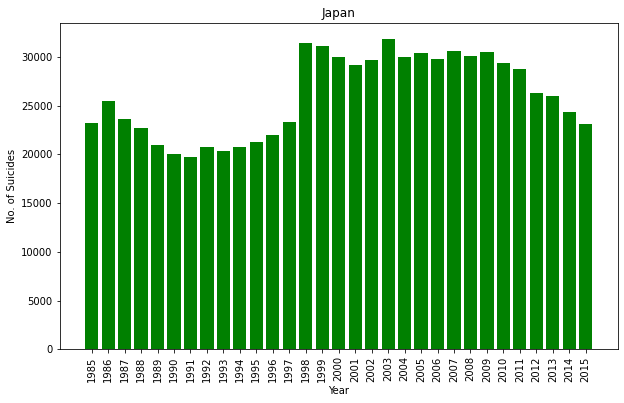

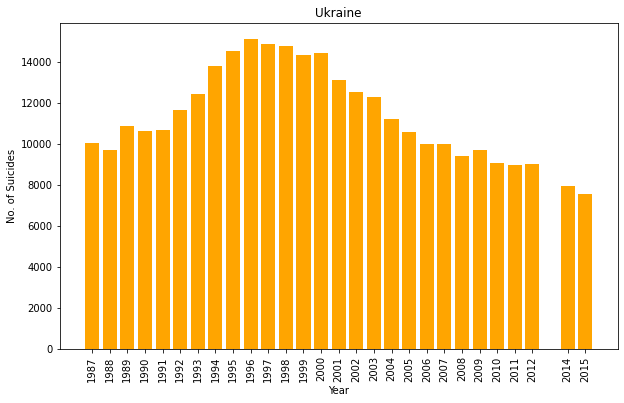

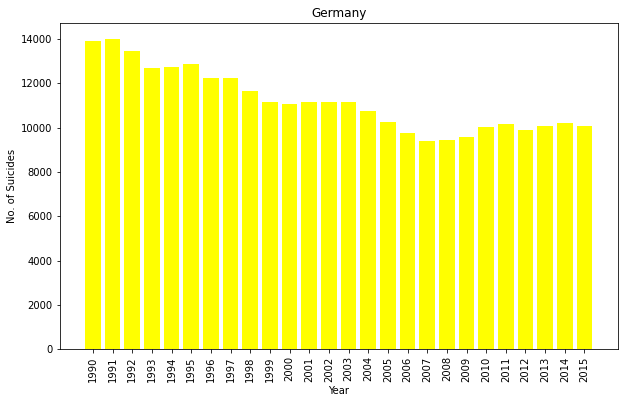

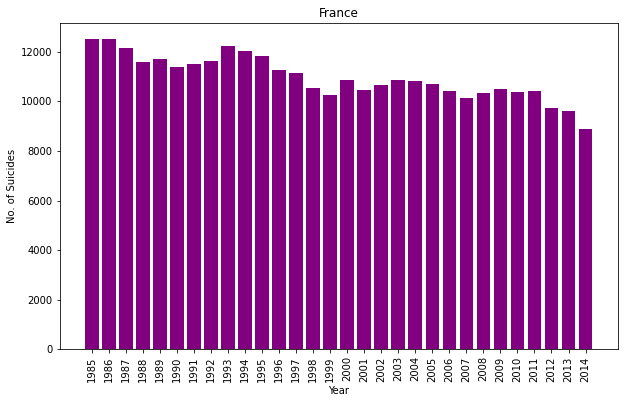

In [7]:
df_grp = df.groupby(["country", "year"]).sum().reset_index().groupby("country")
cols = ['red','blue','green','orange','yellow','purple']
i=0
for k in top_avg_yrly_suic:
    plt.figure(figsize=(10, 6))
    plt.bar(df_grp.get_group(k)["year"], df_grp.get_group(k)["suicides_no"],color=cols[i])
    plt.xlabel('Year')
    plt.ylabel('No. of Suicides')
    plt.xticks(df_grp.get_group(k)["year"], rotation=90)
    plt.title(k)
    plt.show()
    i+=1

#Mix of Age groups in top 6 countries

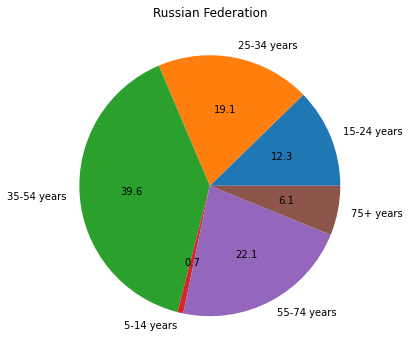

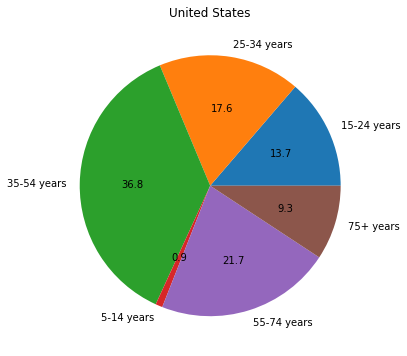

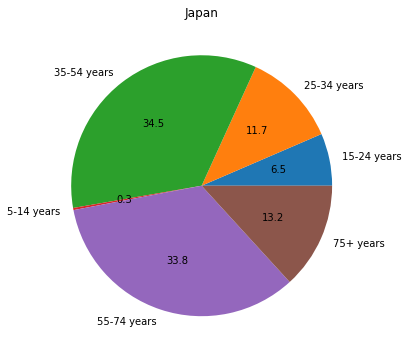

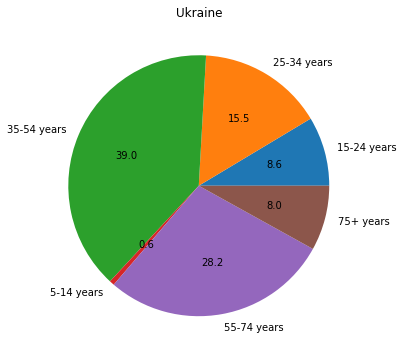

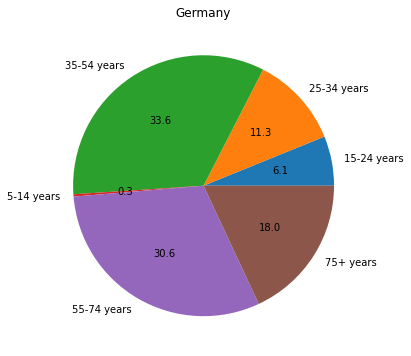

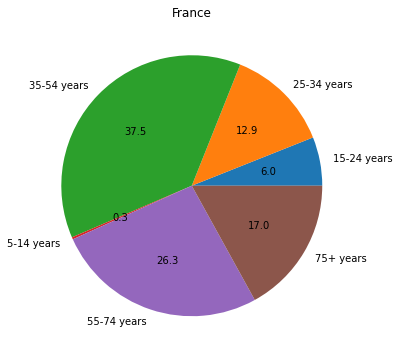

In [8]:
for k in top_avg_yrly_suic:
    plt.figure(figsize=(10, 6))
    df_age = df[df['country']==k][['age','suicides_no']]
    df_age = df_age.groupby('age').sum().sort_values('age')
    plt.pie([x*100 for x in df_age['suicides_no']],labels=[x for x in df_age.index] , autopct='%0.1f')
    plt.title(k)
    plt.show()

#Consistency of difference between males and females in suicide rates

### Plotting pie chart for suicides in different generations sex-wise for top 6 countries

In [9]:
df_age = df[df['country']==k][['generation','suicides_no', 'sex']]
df_age_female = df_age.groupby(['sex', 'generation']).sum().sort_values('generation').reset_index().groupby('sex').get_group('female')
df_age_male = df_age.groupby(['sex', 'generation']).sum().sort_values('generation').reset_index().groupby('sex').get_group('male')

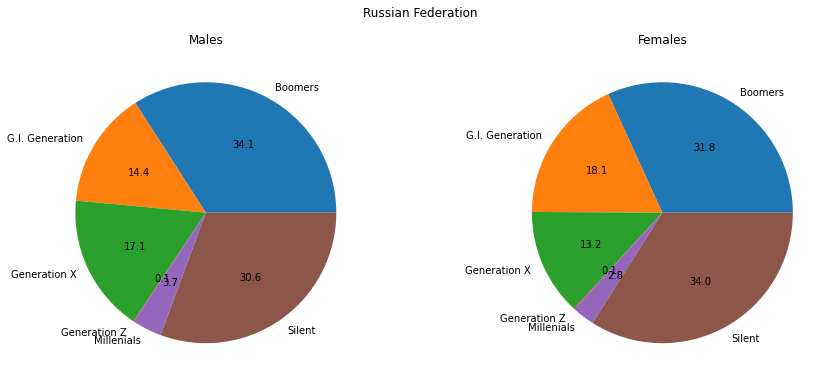

<Figure size 1440x432 with 0 Axes>

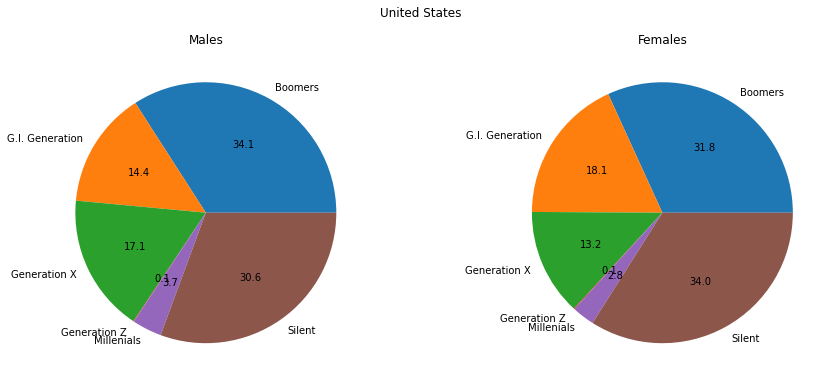

<Figure size 1440x432 with 0 Axes>

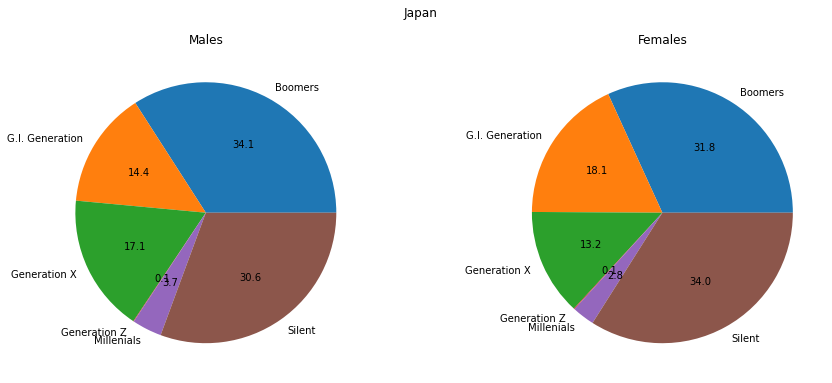

<Figure size 1440x432 with 0 Axes>

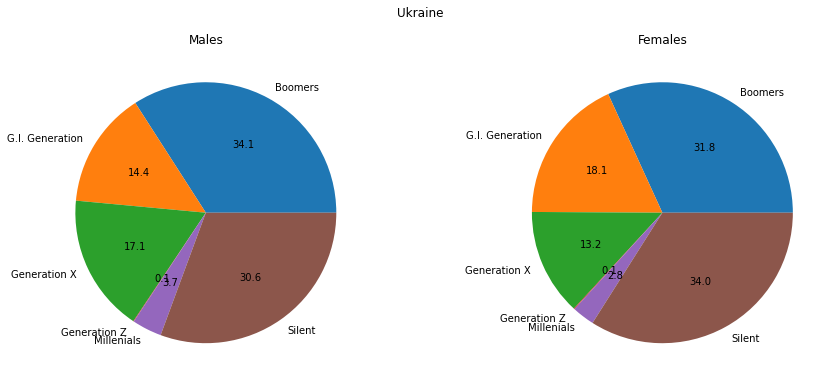

<Figure size 1440x432 with 0 Axes>

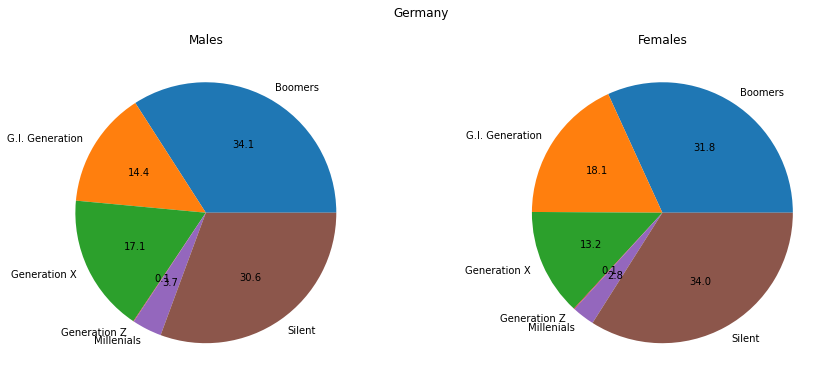

<Figure size 1440x432 with 0 Axes>

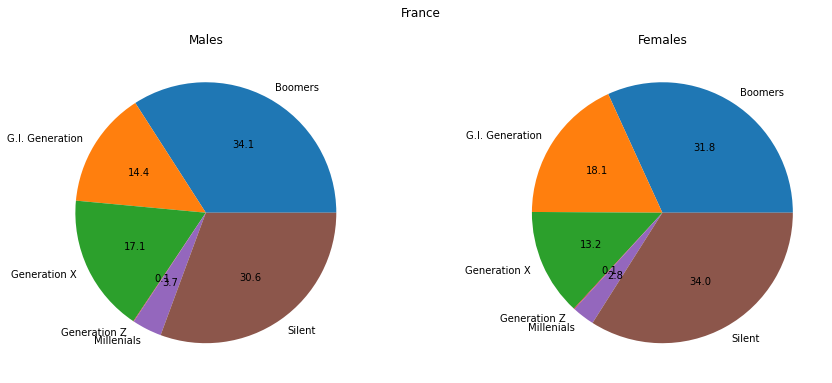

<Figure size 1440x432 with 0 Axes>

In [10]:
for k in top_avg_yrly_suic:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    plt.figure(figsize=(20, 6))
    # ax2.figure(figsize=(10, 6))
    fig.suptitle(k)
    ax1.pie([x*100 for x in df_age_male['suicides_no']],labels=[x for x in df_age_male['generation']] , autopct='%0.1f')
    ax2.pie([x*100 for x in df_age_female['suicides_no']],labels=[x for x in df_age_female['generation']] , autopct='%0.1f')
    # plt.title(k)
    ax1.set_title('Males')
    ax2.set_title('Females')
    fig.show()

### Suicides grouped by sex for top 6 countries

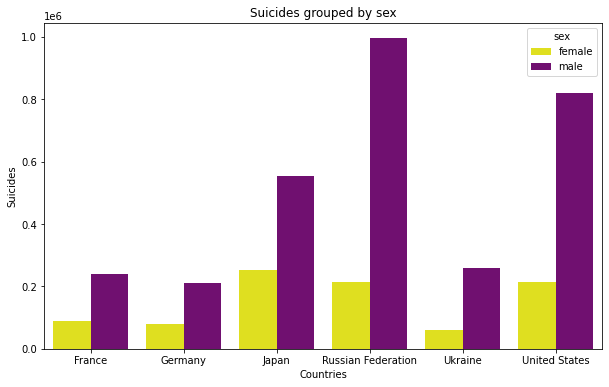

In [11]:
df_sex = df[df["country"].isin([k for k in top_avg_yrly_suic])]
df_sex_grouped = df_sex.groupby(["country","sex"]).sum().reset_index()
color_set=("green", "blue")
plt.figure(figsize = (10,6))
sns.barplot(x = "country", y = "suicides_no", hue = "sex", data = df_sex_grouped, palette=("yellow", "purple"))
plt.xlabel("Countries")
plt.ylabel("Suicides")
plt.title("Suicides grouped by sex")
plt.show()










#Worst Year for each generation in US

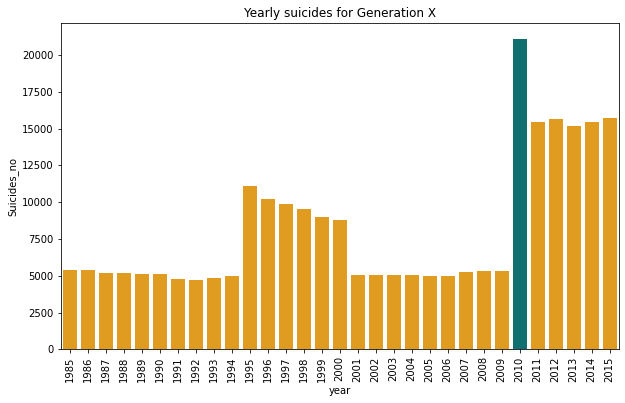

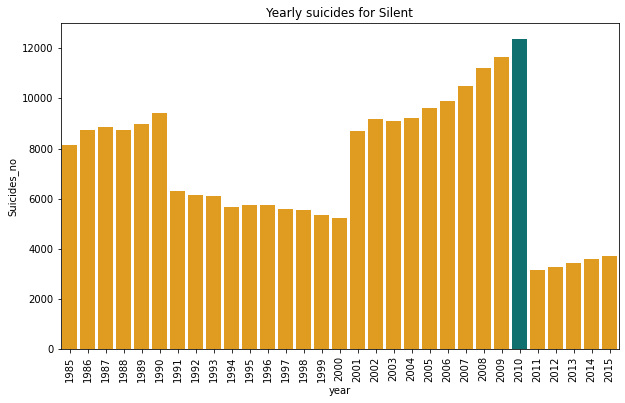

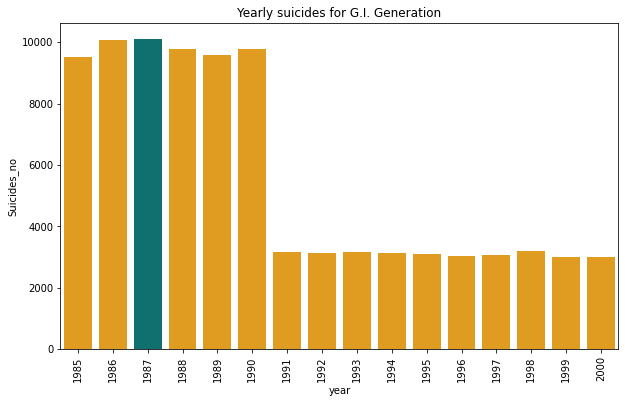

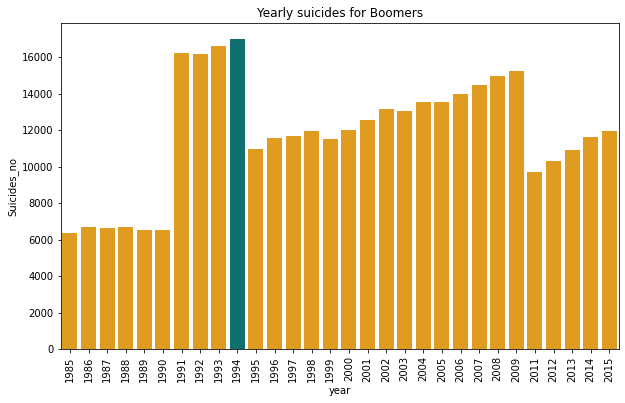

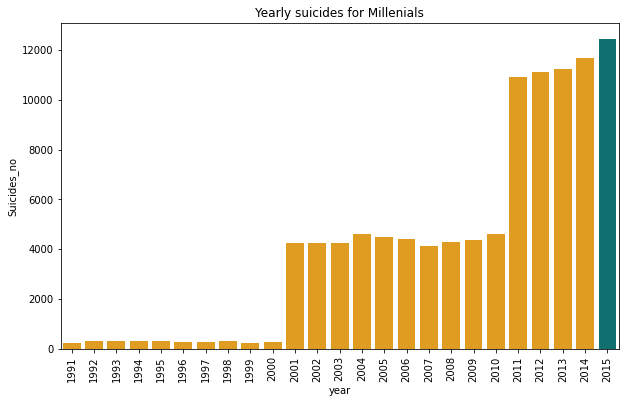

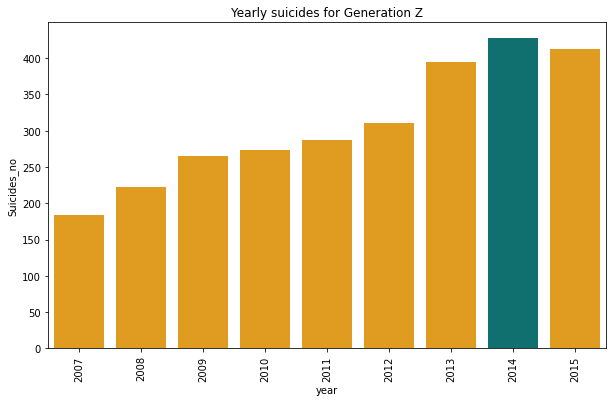

In [12]:
df_gen = df[df['country']=='United States'].groupby(["generation","year"]).sum().reset_index()

for gen in pd.unique(df["generation"]):
  df_gen1 = df_gen[df_gen['generation']==gen]

  col = ['orange' if y < max(df_gen1["suicides_no"]) else 'teal' for y in df_gen1["suicides_no"]]

  plt.figure(figsize = (10, 6))
  sns.barplot(x = "year" , y = "suicides_no", data=df_gen1 , palette = col)
  plt.xticks(rotation=90)
  plt.ylabel("Suicides_no")
  plt.title("Yearly suicides for " + gen)
  plt.show()

#Bihistogram

In [13]:
rd.seed(5)
samp = rd.choices(df['country'].unique(),k=4)
year =2010

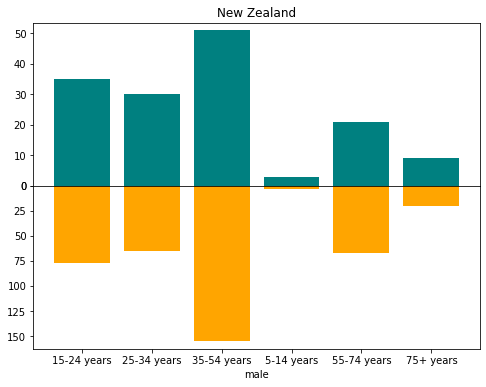

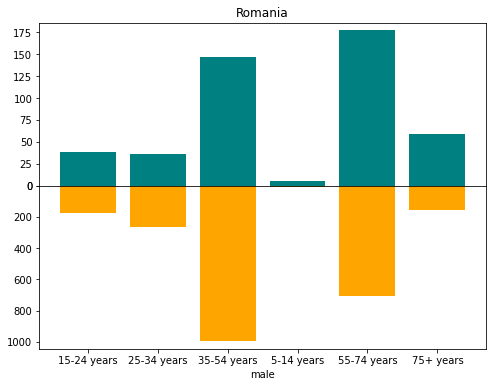

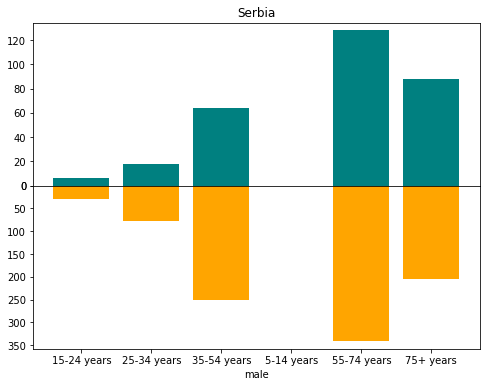

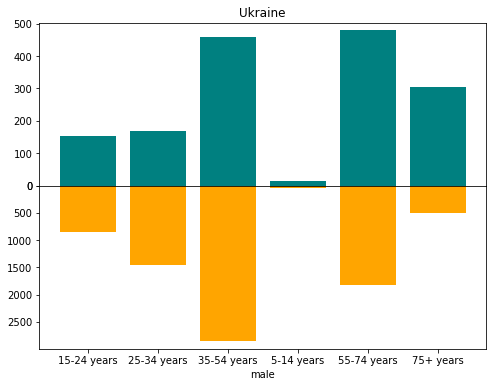

In [14]:
for cont in samp:
    df_bihist = df.loc[(df['country']==cont)&(df['year']==year)][['age','suicides_no','sex']]
    df_bihist = pd.pivot_table(df_bihist,index='age',columns='sex',values='suicides_no',aggfunc=np.sum)
    
    fig, axes = plt.subplots( nrows=2, ncols=1, sharex=True, figsize=(8,6))
    
    for ax, column, color, invert in zip(axes.ravel(), df_bihist.columns, ['teal', 'orange'],  [False,True]):
        ax.bar([x for x in df_bihist[column].index],[x for x in df_bihist[column]], color=color)
        if invert:
            ax.invert_yaxis()
            ax.set_xlabel(column)
        else:
            ax.set_title(cont)
    plt.subplots_adjust(hspace=0)
    plt.show()

# Bubble Plots

In [15]:
df_bubplot = df.groupby("HDI for year").sum().reset_index()

fig = px.scatter(df_bubplot, x="population", y="suicides/100k pop", size="HDI for year", color="HDI for year", log_x=True, size_max=20)
fig.show()